In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor
import joblib

# Load dataset
df = pd.read_csv('movie_statistic_dataset.csv')

print("Jumlah data:", df.shape)
df.head()


Jumlah data: (4380, 14)


,movie_title,production_date,genres,runtime_minutes,director_name,director_professions,director_birthYear,director_deathYear,movie_averageRating,movie_numerOfVotes,approval_Index,Production budget $,Domestic gross $,Worldwide gross $
0,Avatar: The Way of Water,2022-12-09,"Action,Adventure,Fantasy",192.0,James Cameron,"writer,producer,director",1954,alive,7.8,277543.0,7.061101,460000000,667830256,2265935552
1,Avengers: Endgame,2019-04-23,"Action,Adventure,Drama",181.0,-,-,-,-,8.4,1143642.0,8.489533,400000000,858373000,2794731755
2,Pirates of the Caribbean: On Stranger Tides,2011-05-20,"Action,Adventure,Fantasy",137.0,Rob Marshall,"director,miscellaneous,producer",1960,alive,6.6,533763.0,6.272064,379000000,241071802,1045713802
3,Avengers: Age of Ultron,2015-04-22,"Action,Adventure,Sci-Fi",141.0,Joss Whedon,"writer,producer,director",1964,alive,7.3,870573.0,7.214013,365000000,459005868,1395316979
4,Avengers: Infinity War,2018-04-25,"Action,Adventure,Sci-Fi",149.0,-,-,-,-,8.4,1091968.0,8.460958,300000000,678815482,2048359754


In [3]:
# Hapus kolom yang tidak diperlukan
drop_cols = [
    'movie_title', 'production_date',
    'director_name', 'director_professions',
    'director_birthYear', 'director_deathYear'
]
df_clean = df.drop(columns=[col for col in drop_cols if col in df.columns])

# Buang missing values
df_clean = df_clean.dropna()

print("Data setelah cleaning:", df_clean.shape)
df_clean.head()


Data setelah cleaning: (4380, 8)


,genres,runtime_minutes,movie_averageRating,movie_numerOfVotes,approval_Index,Production budget $,Domestic gross $,Worldwide gross $
0,"Action,Adventure,Fantasy",192.0,7.8,277543.0,7.061101,460000000,667830256,2265935552
1,"Action,Adventure,Drama",181.0,8.4,1143642.0,8.489533,400000000,858373000,2794731755
2,"Action,Adventure,Fantasy",137.0,6.6,533763.0,6.272064,379000000,241071802,1045713802
3,"Action,Adventure,Sci-Fi",141.0,7.3,870573.0,7.214013,365000000,459005868,1395316979
4,"Action,Adventure,Sci-Fi",149.0,8.4,1091968.0,8.460958,300000000,678815482,2048359754


In [4]:
X = df_clean.drop(columns=['Worldwide gross $'])
y = df_clean['Worldwide gross $']

categorical_columns = ['genres']


In [5]:
# One-Hot Encoding
ct = ColumnTransformer([
    ('onehot', OneHotEncoder(handle_unknown='ignore'), categorical_columns)
], remainder='passthrough')

X_encoded = ct.fit_transform(X)

# Split train-test
X_train, X_test, y_train, y_test = train_test_split(
    X_encoded, y, test_size=0.2, random_state=42
)


In [6]:
model = RandomForestRegressor(
    n_estimators=260,
    random_state=42,
    n_jobs=-1
)

model.fit(X_train, y_train)

print("Training selesai!")


Training selesai!


===== Hasil Evaluasi =====
RMSE: 58311681.895196624
R2 Score: 0.9243317937582922


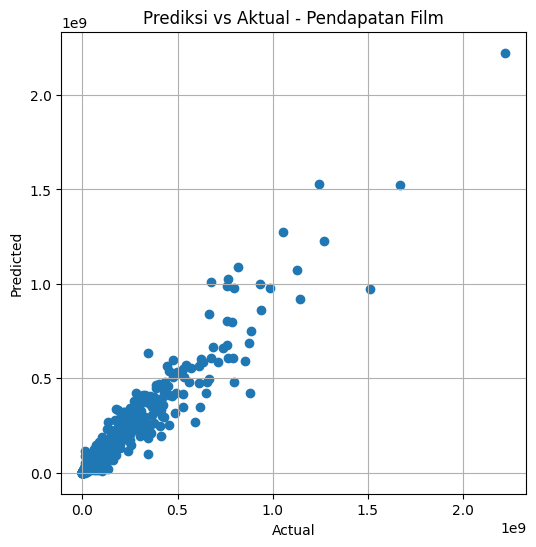

In [7]:
y_pred = model.predict(X_test)

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print("===== Hasil Evaluasi =====")
print("RMSE:", rmse)
print("R2 Score:", r2)

# Visualisasi
plt.figure(figsize=(6,6))
plt.scatter(y_test, y_pred)
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Prediksi vs Aktual - Pendapatan Film")
plt.grid(True)
plt.show()


                                       Feature  Importance
359                remainder__Domestic gross $    0.900536
358             remainder__Production budget $    0.042845
354                 remainder__runtime_minutes    0.018334
356              remainder__movie_numerOfVotes    0.011346
357                  remainder__approval_Index    0.006506
355             remainder__movie_averageRating    0.005241
8      onehot__genres_Action,Adventure,Fantasy    0.001231
79   onehot__genres_Adventure,Animation,Comedy    0.001075
14    onehot__genres_Action,Adventure,Thriller    0.001042
13      onehot__genres_Action,Adventure,Sci-Fi    0.001042


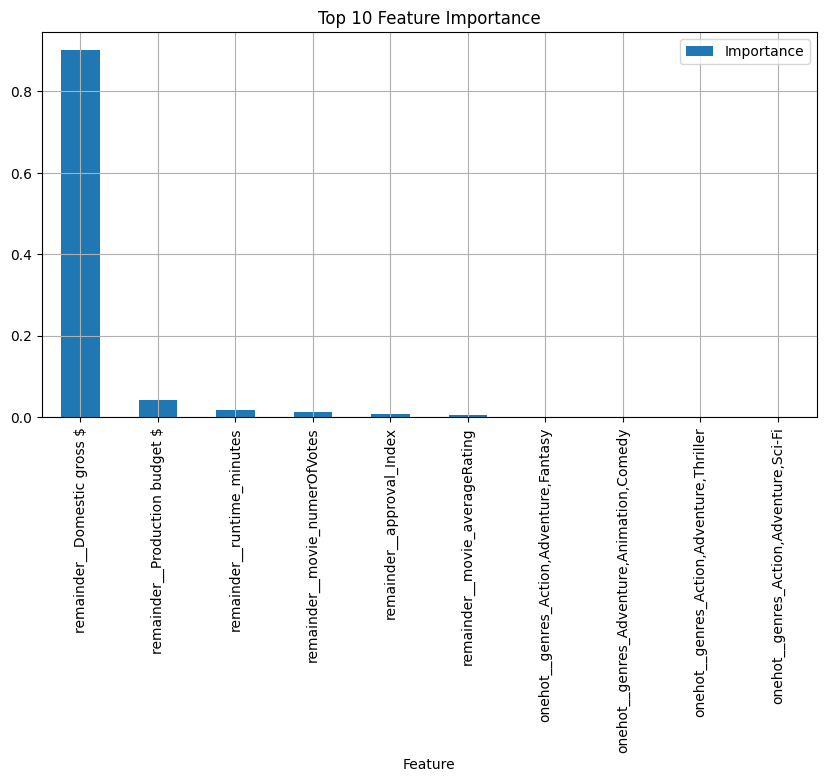

In [8]:
feature_names = ct.get_feature_names_out()
importances = model.feature_importances_

feat_imp = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

print(feat_imp.head(10))
feat_imp.head(10).plot(kind='bar', x='Feature', figsize=(10,5))
plt.title("Top 10 Feature Importance")
plt.grid(True)
plt.show()


In [9]:
joblib.dump(model, "movie_model.pkl")
joblib.dump(ct, "encoder.pkl")
print("Model dan Encoder berhasil disimpan!")


Model dan Encoder berhasil disimpan!
